In [ ]:
import tensorflow as tf

2024-08-17 14:47:31.601822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 14:47:31.619717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 14:47:31.623201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-17 14:47:31.636014: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-17 14:47:32.238859: W tensorflow/compiler/tf2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import os, shutil # Library for navigating files
from keras import backend as K
from keras import backend, models, layers, optimizers, regularizers
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator# Library for data augmentation
from keras.preprocessing import image

np.random.seed(1)

In [ ]:

#from google.colab import drive  # Library to mount google drives
#drive.mount('/content/gdrive')
base_dir = '//home/gabriel/Desktop/msds696'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Check the number of files in each class dirrectory
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/two")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/two")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/two")))

80
80
80
20
20
20
100
100
100


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    class_mode='categorical') # The classification is binary.

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# Build a plotting function
def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['categorical_accuracy']
  val_acc_values = history_dict['val_categorical_accuracy']
  epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('_categorical_Accuracy')
  plt.legend()
  return plt.show()

In [ ]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


2024-08-17 14:47:33.261780: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-08-17 14:47:33.261798: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: gabriel-desktop
2024-08-17 14:47:33.261803: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: gabriel-desktop
2024-08-17 14:47:33.261877: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.90.7
2024-08-17 14:47:33.261895: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  555.42.02  Release Build  (dvs-builder@U16-I3-A03-02-4)  Mon May 13 17:10:33 UTC 2024
GC

In [ ]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))

  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))

  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))


  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['categorical_accuracy'])
  return model

In [ ]:
model = Base_CNN()

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - categorical_accuracy: 0.6207 - loss: 1.4270 - val_categorical_accuracy: 0.6667 - val_loss: 0.8078
Epoch 2/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - categorical_accuracy: 1.0000 - loss: 8.3446e-08

2024-08-17 14:47:36.059120: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.2636e-07 - val_categorical_accuracy: 0.3333 - val_loss: 0.8997
Epoch 3/100


2024-08-17 14:47:36.376604: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - categorical_accuracy: 1.0000 - loss: 8.5288e-08 - val_categorical_accuracy: 0.3333 - val_loss: 1.8455
Epoch 4/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - categorical_accuracy: 1.0000 - loss: 3.5763e-08

2024-08-17 14:47:38.532235: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 8.4043e-08 - val_categorical_accuracy: 0.3333 - val_loss: 2.0617
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - categorical_accuracy: 1.0000 - loss: 1.2588e-07 - val_categorical_accuracy: 0.3333 - val_loss: 3.1368
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.3351e-07 - val_categorical_accuracy: 0.3333 - val_loss: 3.3509
Epoch 7/100


2024-08-17 14:47:41.174971: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - categorical_accuracy: 1.0000 - loss: 1.7845e-07 - val_categorical_accuracy: 0.3333 - val_loss: 4.3366
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 3.8445e-08 - val_categorical_accuracy: 0.3333 - val_loss: 4.5174
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - categorical_accuracy: 1.0000 - loss: 1.4063e-07 - val_categorical_accuracy: 0.3333 - val_loss: 5.3705
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - categorical_accuracy: 1.0000 - loss: 3.6955e-08 - val_categorical_accuracy: 0.3333 - val_loss: 5.5297
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - categorical_accuracy: 1.0000 - loss: 7.1128e-08 - val_categorical_accuracy: 0.3333 - val_loss: 6.2777
Epoch 12/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - categorical_accuracy: 1.0000 - loss: 1.6093e-07

2024-08-17 14:47:47.346074: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 1.1265e-07 - val_categorical_accuracy: 0.3333 - val_loss: 6.4237
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - categorical_accuracy: 1.0000 - loss: 1.0495e-07 - val_categorical_accuracy: 0.3333 - val_loss: 7.0975
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 5.3644e-08 - val_categorical_accuracy: 0.3333 - val_loss: 7.2220
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - categorical_accuracy: 1.0000 - loss: 1.2247e-07 - val_categorical_accuracy: 0.3333 - val_loss: 7.8206
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 7.5102e-08 - val_categorical_accuracy: 0.3333 - val_loss: 7.9354
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - categorical_accuracy: 1.0000 - loss: 5.8501e-08 - val_categorical_accuracy: 0.3333 - val_loss: 8.4721
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_a

2024-08-17 14:47:58.638488: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - categorical_accuracy: 1.0000 - loss: 7.7689e-08 - val_categorical_accuracy: 0.3333 - val_loss: 10.0117
Epoch 24/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.0014e-07 - val_categorical_accuracy: 0.3333 - val_loss: 10.0808
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - categorical_accuracy: 1.0000 - loss: 1.0366e-07 - val_categorical_accuracy: 0.3333 - val_loss: 10.4086
Epoch 26/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 10.4644
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - categorical_accuracy: 1.0000 - loss: 5.0543e-08 - val_categorical_accuracy: 0.3333 - val_loss: 10.7467
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.6093e-08 - val_categorical_accuracy: 0.3333 - val_loss: 10.7973
Epoch 29/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - catego

2024-08-17 14:48:22.079907: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 3.2783e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.9952
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - categorical_accuracy: 1.0000 - loss: 3.6907e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.9779
Epoch 46/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.8775e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.9729
Epoch 47/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - categorical_accuracy: 1.0000 - loss: 1.9743e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.9249
Epoch 48/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 5.2452e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.9129
Epoch 49/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - categorical_accuracy: 1.0000 - loss: 2.3291e-08 - val_categorical_accuracy: 0.3333 - val_loss: 11.8281
Epoch 50/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categor

2024-08-17 14:49:07.742685: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - categorical_accuracy: 1.0000 - loss: 4.6904e-08 - val_categorical_accuracy: 0.3333 - val_loss: 3.2102
Epoch 88/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 3.0821
Epoch 89/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - categorical_accuracy: 1.0000 - loss: 3.0784e-08 - val_categorical_accuracy: 0.3333 - val_loss: 2.4905
Epoch 90/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 7.2420e-08 - val_categorical_accuracy: 0.3333 - val_loss: 2.3995
Epoch 91/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - val_categorical_accuracy: 0.6667 - val_loss: 1.9229
Epoch 92/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.0192e-07 - val_categorical_accuracy: 0.6667 - val_loss: 1.8505
Epoch 93/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - categorical_

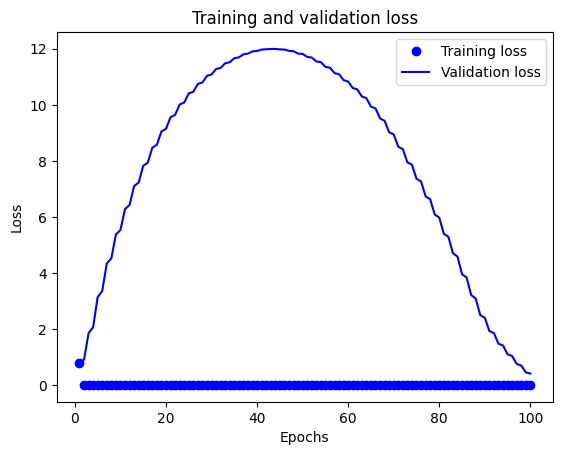

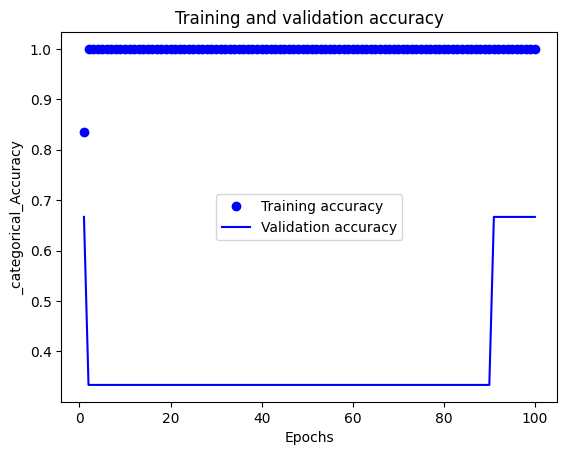

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6698 - loss: 0.4007


test_acc: 0.6666666865348816


In [ ]:
history = model.fit( # The image data must come from the image generator that takes the images from the correct dirrectory. https://keras.io/models/sequential/
    train_generator, # Images are taken from the train_generator
    steps_per_epoch=10, # The number of steps from the train_generator before one epoch if finished.
                         # 100 steps * 20 batch size in train generator = 2000 training images per epoch. This way each traning image will be sampled once per epoch.
    epochs=100, # Train data for 50 epochs
    validation_data=validation_generator, # Take data from the validataion generator
    validation_steps=50, # 50 steps * 20 batch size in validation generator = 1000 validation images per epoch
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, restore_best_weights = True)]) # We will not use call backs to stop early.

plot_history(history) # Use our plot function to plot the loss and accuracy.

test_loss, test_acc =model.evaluate(test_generator, steps = 50) # Test images are in a dirrectory so they must flow from dirrectory.
                                                                           # 50 steps * 20 batch size in test generator = 1000 test images per epoch
print('test_acc:', test_acc)

model.save('phm_pic_base.h5')